# Consultas de datos en Northwind.

Este proyecto tiene como objetivo analizar la base de datos Northwind, un conjunto de datos clásico que simula una empresa de ventas (productos, pedidos, clientes y empleados). Mediante consultas SQL y visualizaciones en Python, exploraremos patrones de ventas, desempeño de empleados, relaciones entre tablas y métricas clave para la toma de decisiones empresariales.

In [1]:
import sqlite3
import requests

# URL del archivo en GitHub (raw)
url = "https://github.com/cveram96/Portfolio/raw/main/Files/northwind_small.sqlite"

# Descargar el archivo desde GitHub
response = requests.get(url)
response.raise_for_status()

# Guardar temporalmente el archivo en disco
db_filename = "northwind_temp.sqlite"
with open(db_filename, "wb") as f:
    f.write(response.content)

# Conectar a la base de datos SQLite
conn = sqlite3.connect(db_filename)
cursor = conn.cursor()

print("Base de datos cargada correctamente desde GitHub.")

# Listar las tablas disponibles
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tablas = cursor.fetchall()

print("Tablas en la base de datos:")
for tabla in tablas:
    print(tabla[0])




Base de datos cargada correctamente desde GitHub.
Tablas en la base de datos:
Employee
Category
Customer
Shipper
Supplier
Order
Product
OrderDetail
CustomerCustomerDemo
CustomerDemographic
Region
Territory
EmployeeTerritory


In [2]:
import pandas as pd

from IPython.display import display

def sql(query):
    df = pd.read_sql_query(query, conn)
    display(df)

#Prueba
sql("SELECT * FROM Region")

,Id,RegionDescription
0,1,Eastern
1,2,Western
2,3,Northern
3,4,Southern


---
Para obtener mejor visualización se describen cada una de las tablas y la información que representan:

* **EMPLOYEE**: Almacena información sobre los empleados de la empresa, incluyendo datos personales, cargo, fecha de contratación y supervisor directo.

* **CATEGORY**:Guarda las categorías de productos disponibles, con su respectivo nombre y descripción.

* **CUSTOMER** :Registra los clientes de la empresa, incluyendo datos de contacto, dirección y nombre de la compañía.

* **SHIPPER**:Contiene información sobre las empresas de transporte encargadas de realizar los envíos.

* **SUPPLIER** :Almacena datos sobre los proveedores de los productos, incluyendo información de contacto y dirección.

* **ORDER**: Registra los pedidos realizados por los clientes, con detalles sobre el empleado que los gestionó, fechas clave y datos de envío.

* **PRODUCT**: Guarda información sobre los productos disponibles para la venta, incluyendo nombre, categoría, proveedor, precio y stock.

* **ORDERDETAIL**: Registra el detalle de cada pedido, especificando los productos adquiridos, cantidad, precio unitario y posibles descuentos.

* **CUSTOMERCUSTOMERDEMO**: Relaciona clientes con su tipo de clasificación demográfica.

* **CUSTOMERDEMOGRAPHIC**:Guarda información sobre los distintos tipos de clientes según su perfil demográfico.

* **REGION**: Registra las regiones geográficas en las que opera la empresa.

* **TERRITORY**: Define los territorios dentro de cada región, con su respectiva identificación y descripción.

* **EMPLOYEETERRITORY**: Relaciona empleados con los territorios donde realizan actividades comerciales.

In [3]:
import sqlite3

# Usando tu conexión existente (conn)
cursor = conn.cursor()

print("🔍 Estructura completa de las tablas:\n")

# Obtener todas las tablas
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tablas = [tabla[0] for tabla in cursor.fetchall()]

# Mostrar columnas de cada tabla de forma clara
for tabla in tablas:
    print(f"\n📌 TABLA: {tabla.upper()}")
    print("-" * 40)

    # Obtener columnas
    cursor.execute(f'PRAGMA table_info("{tabla}");')
    columnas = cursor.fetchall()

    if not columnas:
        print("  (No se encontraron columnas)")
        continue

    # Imprimir encabezados
    print(f"{'Columna':<20} {'Tipo':<15} {'PK':<5}")
    print("-" * 40)

    # Imprimir cada columna
    for col in columnas:
        col_name = col[1]
        col_type = col[2]
        col_pk = "Sí" if col[5] else "No"

        print(f"{col_name:<20} {col_type:<15} {col_pk:<5}")

print("\n✅ Análisis completado")


🔍 Estructura completa de las tablas:


📌 TABLA: EMPLOYEE
----------------------------------------
Columna              Tipo            PK   
----------------------------------------
Id                   INTEGER         Sí   
LastName             VARCHAR(8000)   No   
FirstName            VARCHAR(8000)   No   
Title                VARCHAR(8000)   No   
TitleOfCourtesy      VARCHAR(8000)   No   
BirthDate            VARCHAR(8000)   No   
HireDate             VARCHAR(8000)   No   
Address              VARCHAR(8000)   No   
City                 VARCHAR(8000)   No   
Region               VARCHAR(8000)   No   
PostalCode           VARCHAR(8000)   No   
Country              VARCHAR(8000)   No   
HomePhone            VARCHAR(8000)   No   
Extension            VARCHAR(8000)   No   
Photo                BLOB            No   
Notes                VARCHAR(8000)   No   
ReportsTo            INTEGER         No   
PhotoPath            VARCHAR(8000)   No   

📌 TABLA: CATEGORY
-------------------------

Consultas Realizadas
A continuación se presentan las 10 consultas realizad

# 1. Productos más vendidos (por cantidad)


In [4]:
# Productos más vendidos (por cantidad)
sql("""
SELECT p.ProductName, SUM(od.Quantity) AS TotalVendido
FROM OrderDetail od
JOIN Product p ON od.ProductId = p.Id
GROUP BY p.ProductName
ORDER BY TotalVendido DESC
LIMIT 10;
""")

,ProductName,TotalVendido
0,Camembert Pierrot,1577
1,Raclette Courdavault,1496
2,Gorgonzola Telino,1397
3,Gnocchi di nonna Alice,1263
4,Pavlova,1158
5,Rhönbräu Klosterbier,1155
6,Guaraná Fantástica,1125
7,Boston Crab Meat,1103
8,Tarte au sucre,1083
9,Flotemysost,1057


# 2. Clientes que más gastaron (por monto total)


In [5]:
# Clientes que más gastaron (por monto total)
sql("""
SELECT c.CompanyName, SUM(od.UnitPrice * od.Quantity) AS TotalGastado
FROM 'Order' o
JOIN Customer c ON o.CustomerId = c.Id
JOIN OrderDetail od ON o.Id = od.OrderId
GROUP BY c.CompanyName
ORDER BY TotalGastado DESC
LIMIT 10;
""")


,CompanyName,TotalGastado
0,QUICK-Stop,117483.39
1,Save-a-lot Markets,115673.39
2,Ernst Handel,113236.68
3,Hungry Owl All-Night Grocers,57317.39
4,Rattlesnake Canyon Grocery,52245.90
5,Hanari Carnes,34101.15
6,Folk och fä HB,32555.55
7,Mère Paillarde,32203.90
8,Königlich Essen,31745.75
9,White Clover Markets,29073.45


# 3. Ventas mensuales (agrupadas por año-mes)


In [6]:
# Ventas mensuales (agrupadas por año-mes)
sql("""
SELECT strftime('%Y-%m', o.OrderDate) AS Mes,
       SUM(od.UnitPrice * od.Quantity) AS VentasTotales
FROM 'Order' o
JOIN OrderDetail od ON o.Id = od.OrderId
GROUP BY Mes
ORDER BY Mes;
""")

,Mes,VentasTotales
0,2012-07,30192.10
1,2012-08,26609.40
2,2012-09,27636.00
3,2012-10,41203.60
4,2012-11,49704.00
5,2012-12,50953.40
6,2013-01,66692.80
7,2013-02,41207.20
8,2013-03,39979.90
9,2013-04,55699.39


# 4.Empleado con más ventas generadas

In [7]:
# Empleado con más ventas generadas
sql("""
SELECT e.FirstName || ' ' || e.LastName AS Empleado,
       SUM(od.UnitPrice * od.Quantity) AS VentasGeneradas
FROM 'Order' o
JOIN Employee e ON o.EmployeeId = e.Id
JOIN OrderDetail od ON o.Id = od.OrderId
GROUP BY Empleado
ORDER BY VentasGeneradas DESC
LIMIT 1;
""")

,Empleado,VentasGeneradas
0,Margaret Peacock,250187.45


#  5. Productos con stock bajo (alerta de reorden)


In [8]:
# Productos con stock bajo (alerta de reorden)
sql("""
SELECT ProductName, UnitsInStock, ReorderLevel
FROM Product
WHERE UnitsInStock < ReorderLevel
ORDER BY UnitsInStock ASC;
""")

,ProductName,UnitsInStock,ReorderLevel
0,Gorgonzola Telino,0,20
1,Sir Rodney's Scones,3,5
2,Louisiana Hot Spiced Okra,4,20
3,Longlife Tofu,4,5
4,Rogede sild,5,15
5,Scottish Longbreads,6,15
6,Mascarpone Fabioli,9,25
7,Nord-Ost Matjeshering,10,15
8,Maxilaku,10,15
9,Gravad lax,11,25


# 6 .Categoría más vendida (por ingresos)

In [9]:
# Categoría más vendida (por ingresos)
sql("""
SELECT c.CategoryName, SUM(od.UnitPrice * od.Quantity) AS VentasPorCategoria
FROM OrderDetail od
JOIN Product p ON od.ProductId = p.Id
JOIN Category c ON p.CategoryId = c.Id
GROUP BY c.CategoryName
ORDER BY VentasPorCategoria DESC
LIMIT 5;
""")


,CategoryName,VentasPorCategoria
0,Beverages,286526.95
1,Dairy Products,251330.50
2,Meat/Poultry,178188.80
3,Confections,177099.10
4,Seafood,141623.09


# 7. Proveedores más lentos (tiempo promedio de entrega)


In [10]:
# Proveedores más lentos (tiempo promedio de entrega)
sql("""
SELECT s.CompanyName AS Proveedor,
       ROUND(AVG(julianday(o.ShippedDate) - julianday(o.OrderDate)), 2) AS DiasPromedio
FROM 'Order' o
JOIN OrderDetail od ON o.Id = od.OrderId
JOIN Product p ON od.ProductId = p.Id
JOIN Supplier s ON p.SupplierId = s.Id
WHERE o.ShippedDate IS NOT NULL
GROUP BY Proveedor
ORDER BY DiasPromedio DESC;
""")

,Proveedor,DiasPromedio
0,Karkki Oy,10.09
1,Aux joyeux ecclésiastiques,9.51
2,Tokyo Traders,9.30
3,Leka Trading,9.14
4,Plutzer Lebensmittelgroßmärkte AG,9.07
5,Heli Süßwaren GmbH & Co. KG,9.05
6,Pasta Buttini s.r.l.,8.94
7,Norske Meierier,8.94
8,New Orleans Cajun Delights,8.69
9,Cooperativa de Quesos 'Las Cabras',8.68


# 8. Clientes inactivos (sin pedidos en más de 1 año)

In [11]:
# Clientes inactivos (sin pedidos en más de 1 año)
sql("""
SELECT c.CompanyName AS Cliente,
       MAX(o.OrderDate) AS UltimoPedido
FROM Customer c
LEFT JOIN 'Order' o ON c.Id = o.CustomerId
GROUP BY c.Id
HAVING UltimoPedido < date('now', '-1 year') OR UltimoPedido IS NULL
ORDER BY UltimoPedido;
""")


,Cliente,UltimoPedido
0,Antonio Moreno Taquería,None
1,Du monde entier,None
2,FISSA Fabrica Inter. Salchichas S.A.,None
3,Océano Atlántico Ltda.,None
4,Paris spécialités,None
...,...,...
86,Pericles Comidas clásicas,2014-05-05
87,Bon app,2014-05-06
88,Rattlesnake Canyon Grocery,2014-05-06
89,Richter Supermarkt,2014-05-06


# 9. Relación entre ventas y stock (análisis de inventario)

In [12]:
# Relación entre ventas y stock (análisis de inventario)
sql("""
SELECT p.ProductName,
       SUM(od.Quantity) AS UnidadesVendidas,
       p.UnitsInStock AS StockActual,
       (p.UnitsInStock - SUM(od.Quantity)) AS Diferencia
FROM OrderDetail od
JOIN Product p ON od.ProductId = p.Id
GROUP BY p.Id
ORDER BY UnidadesVendidas DESC;
""")

,ProductName,UnidadesVendidas,StockActual,Diferencia
0,Camembert Pierrot,1577,19,-1558
1,Raclette Courdavault,1496,79,-1417
2,Gorgonzola Telino,1397,0,-1397
3,Gnocchi di nonna Alice,1263,21,-1242
4,Pavlova,1158,29,-1129
...,...,...,...,...
72,Laughing Lumberjack Lager,184,52,-132
73,Chocolade,138,15,-123
74,Gravad lax,125,11,-114
75,Genen Shouyu,122,39,-83


# 10. Clientes y su frecuencia de compra

In [17]:
# Clientes y su frecuencia de compra
sql("""
SELECT c.CompanyName AS Cliente,
       COUNT(o.Id) AS TotalPedidos,
       SUM(od.UnitPrice * od.Quantity) AS MontoTotal
FROM Customer c
LEFT JOIN 'Order' o ON c.Id = o.CustomerId
LEFT JOIN OrderDetail od ON o.Id = od.OrderId
GROUP BY c.Id
ORDER BY TotalPedidos DESC;
""")

,Cliente,TotalPedidos,MontoTotal
0,Save-a-lot Markets,116,115673.39
1,Ernst Handel,102,113236.68
2,QUICK-Stop,86,117483.39
3,Rattlesnake Canyon Grocery,71,52245.90
4,Hungry Owl All-Night Grocers,55,57317.39
...,...,...,...
86,Du monde entier,0,NaN
87,FISSA Fabrica Inter. Salchichas S.A.,0,NaN
88,Océano Atlántico Ltda.,0,NaN
89,Paris spécialités,0,NaN


Visualización de datos :

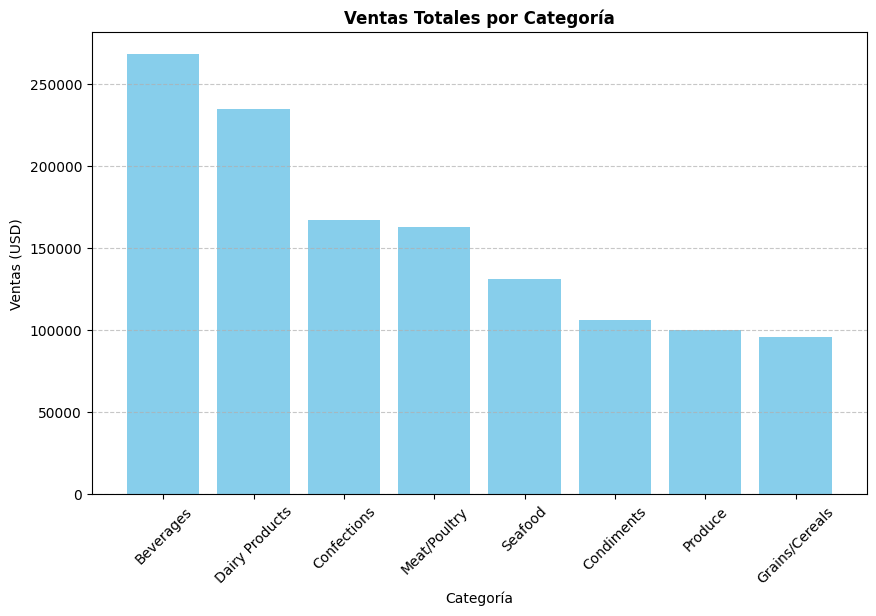

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Consulta SQL
query = """
SELECT
    c.CategoryName AS Categoria,
    SUM(od.UnitPrice * od.Quantity * (1 - od.Discount)) AS VentasTotales
FROM OrderDetail od
JOIN Product p ON od.ProductId = p.Id
JOIN Category c ON p.CategoryId = c.Id
GROUP BY c.CategoryName
ORDER BY VentasTotales DESC;
"""

df_ventas = pd.read_sql_query(query, conn)

# Gráfico
plt.figure(figsize=(10, 6))
plt.bar(df_ventas['Categoria'], df_ventas['VentasTotales'], color='skyblue')
plt.title('Ventas Totales por Categoría', fontweight='bold')
plt.xlabel('Categoría')
plt.ylabel('Ventas (USD)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


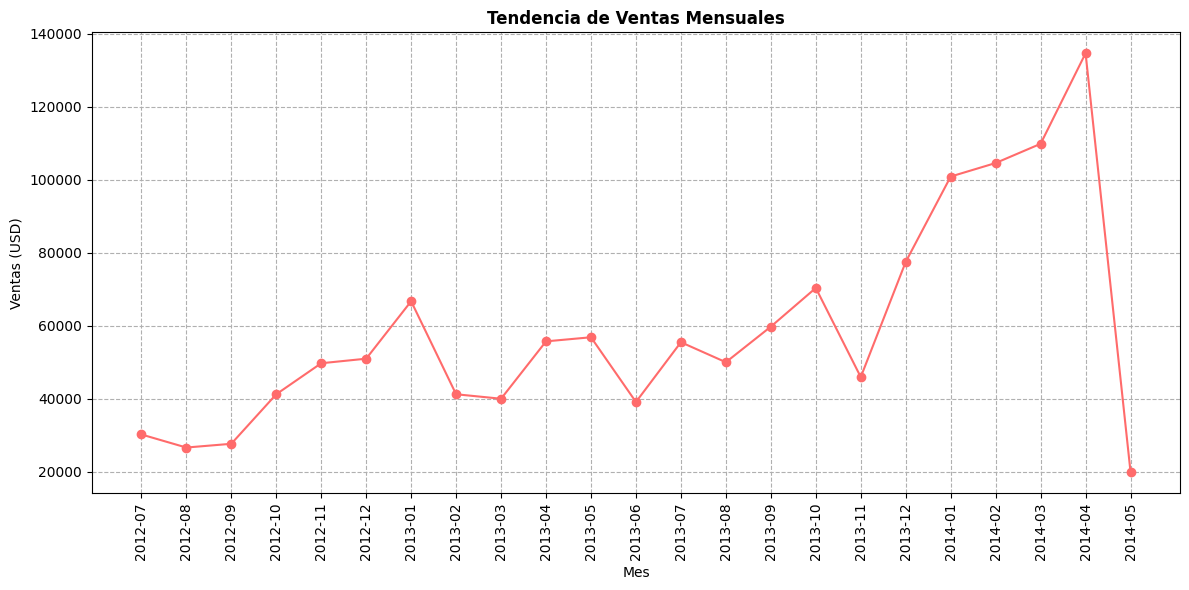

In [15]:
query = """
SELECT
    strftime('%Y-%m', o.OrderDate) AS Mes,
    SUM(od.UnitPrice * od.Quantity) AS Ventas
FROM 'Order' o
JOIN OrderDetail od ON o.Id = od.OrderId
GROUP BY Mes
ORDER BY Mes;
"""

df_tendencia = pd.read_sql_query(query, conn)

plt.figure(figsize=(12, 6))
plt.plot(df_tendencia['Mes'], df_tendencia['Ventas'], marker='o', color='#FF6B6B')
plt.title('Tendencia de Ventas Mensuales', fontweight='bold')
plt.xlabel('Mes')
plt.ylabel('Ventas (USD)')
plt.xticks(rotation=90)
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

In [16]:
import plotly.express as px
import pandas as pd

# Consulta SQL optimizada
query = """
SELECT
    c.Country AS Pais,
    COUNT(DISTINCT c.Id) AS TotalClientes,
    SUM(od.UnitPrice * od.Quantity) AS VentasTotales
FROM Customer c
LEFT JOIN 'Order' o ON c.Id = o.CustomerId
LEFT JOIN OrderDetail od ON o.Id = od.OrderId
GROUP BY c.Country;
"""

df_paises = pd.read_sql_query(query, conn)

# Convertir ventas a miles para mejor visualización
df_paises['VentasTotales'] = df_paises['VentasTotales'] / 1000

# Crear mapa con burbujas más pequeñas
fig = px.scatter_geo(df_paises,
                     locations='Pais',
                     locationmode='country names',
                     size='VentasTotales',
                     size_max=20,  # Reducir tamaño de burbujas
                     color='TotalClientes',
                     color_continuous_scale='Viridis',
                     hover_name='Pais',
                     hover_data={'TotalClientes': True, 'VentasTotales': ':,.1f'},
                     title='Clientes y Ventas por País',
                     projection='natural earth')

# Mejorar diseño
fig.update_layout(
    geo=dict(showcoastlines=True, showland=True, landcolor="rgb(230, 230, 230)"),
    coloraxis_colorbar=dict(title="Clientes"),
    title_x=0.5
)

# Guardar en HTML
file_path = "clientes_ventas_paises.html"
fig.write_html(file_path)

# Mostrar gráfico
fig.show()

print(f"Gráfico guardado como '{file_path}' y mostrado en pantalla.")




Gráfico guardado como 'clientes_ventas_paises.html' y mostrado en pantalla.
